In [ ]:
!pip install sympy numpy pandas matplotlib scipy ipython
# this should take up to 7 minutes

In [4]:
from sympy import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
from IPython.display import display, Math, Latex

In [6]:
def crate_symbol(name):
    return symbols(name, real=True, positive=True)


def crate_model():
    ret_dict = {
        "x1": crate_symbol("x1"),
        "x2": crate_symbol("x2"),
        "x3": crate_symbol("x3"),
        "x4": crate_symbol("x4"),
        "x5": crate_symbol("x5"),
    }
    
    return ret_dict

temp = crate_model()
temp

{'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5}

In [83]:

        
u = crate_symbol("u")

x1 = crate_symbol("x1")
x2 = crate_symbol("x2")
x3 = crate_symbol("x3")
x4 = crate_symbol("x4")
x5 = crate_symbol("x5")

a1 = crate_symbol("a1")
a2 = crate_symbol("a2")
a3 = crate_symbol("a3")
a4 = crate_symbol("a4")
a5 = crate_symbol("a5")

b1 = crate_symbol("b1")
b2 = crate_symbol("b2")
b3 = crate_symbol("b3")
b4 = crate_symbol("b4")
b5 = crate_symbol("b5")

K_GR = crate_symbol("K_GR")
H1 = crate_symbol("H1")
H2 = crate_symbol("H2")
P = crate_symbol("P")
A = crate_symbol("A")
t = crate_symbol("t")

aP = crate_symbol("aP")
aA = crate_symbol("aA")

bP = crate_symbol("bP")
bA = crate_symbol("bA")


mr = 1 / x3
gr = K_GR ** 3 / (x3 ** 3 + K_GR ** 3)
# # gr = 1 / (1 + (x_3 / K_GR) ** 3)
# gr = 1
f = gr * mr
dx1_dt = b1 * u * gr * mr * x5 - a1 * x1
dx2_dt = b2 * x1 * P * gr * x5- a2 * x2
dx3_dt = b3 * x2 * A *x4 * x5 - a3 * x3
dx4_dt = b4 * u -  a4 * x4
dx5_dt = b5 * u * gr - a5 * x5
dP_dt = P * (bP * x1 * x4 - aP)
dA_dt = A * (bA * x2 - aA)

display(
    Matrix(
        [
            Eq(Derivative(x1, t), dx1_dt),
            Eq(Derivative(x2, t), dx2_dt),
            Eq(Derivative(x3, t), dx3_dt),
            Eq(Derivative(x4, t), dx4_dt),
            Eq(Derivative(x5, t), dx5_dt),
        ]
    )
)
model = Matrix([dx1_dt, dx2_dt, dx3_dt, dx4_dt, dx5_dt, dP_dt, dA_dt])
variables = (x1, x2, x3, x4, x5, P, A)

C:\Users\qywoe\AppData\Local\Temp\ipykernel_5416\2729542000.py:49: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  Matrix(


Matrix([
[Eq(Derivative(x1, t), K_GR**3*b1*u*x5/(x3*(K_GR**3 + x3**3)) - a1*x1)],
[  Eq(Derivative(x2, t), K_GR**3*P*b2*x1*x5/(K_GR**3 + x3**3) - a2*x2)],
[                         Eq(Derivative(x3, t), A*b3*x2*x4*x5 - a3*x3)],
[                                 Eq(Derivative(x4, t), -a4*x4 + b4*u)],
[        Eq(Derivative(x5, t), K_GR**3*b5*u/(K_GR**3 + x3**3) - a5*x5)]])

In [28]:
parameters = {
    a1: 1,
    a2: 1,
    a3: 1,
    a4: 1,
    a5: 1,
    b1: 1,
    b2: 1,
    b3: 1,
    b4: 1,
    b5: 1,
    K_GR: 4,
    H1: 1,
    H2: 1,
    aA: 1,
    aP: 1,
    bA: 1,
    bP: 1,
    # P: 1,
    # A: 1,
    # u: 1,
    # x1: 1,
    # x2: 1,
    # x3: 1,
    # x4: 1,
    # x5: 1,
}

parameters

{a1: 1,
 a2: 1,
 a3: 1,
 a4: 1,
 a5: 1,
 b1: 1,
 b2: 1,
 b3: 1,
 b4: 1,
 b5: 1,
 K_GR: 4,
 H1: 1,
 H2: 1,
 P: 1,
 A: 1}

In [22]:
model.subs(parameters)

Matrix([
[u*x5/(x3*(1 + x3**3/K_GR**3)) - x1],
[    x1*x5/(1 + x3**3/K_GR**3) - x2],
[                     x2*x4*x5 - x3],
[                            u - x4],
[        u/(1 + x3**3/K_GR**3) - x5]])

In [81]:
gr

K_GR**3/(K_GR**3 + x3**3)

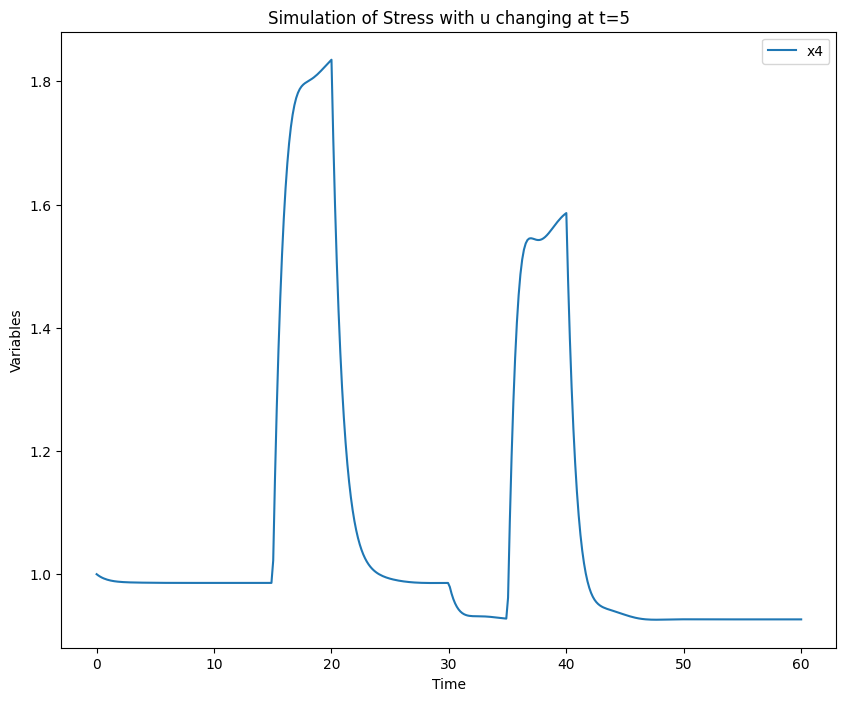

In [53]:
# Define the system of differential equations with piecewise function for u
def model_system(y, t, params):
    x1, x2, x3, x4, x5 = y
    a1, a2, a3, a4, a5, b1, b2, b3, b4, b5, K_GR, P, A = params
    
    # Define u as a piecewise function
    u = 1 if t < 15 or (t > 20 and t < 35) or t > 40 else 2
    K_GR = 4 if t < 30 else 2
    
    # u = 1 if t < 15 and t <20 else 2
    
    mr = 1 / x3
    # gr = 1 / (1 + (x3 / K_GR) ** 3)
    f = gr * mr
    
    dx1_dt = b1 * u * gr * mr - a1 * x1
    dx2_dt = b2 * x1 * P * gr - a2 * x2
    dx3_dt = b3 * x2 * A * x4  - a3 * x3
    dx4_dt = b4 * u * gr - a4 * x4
    dx5_dt = b5 * u * gr - a5 * x5
    

    # dx1_dt = b1 * u * gr * mr * x5 - a1 * x1
    # dx2_dt = b2 * x1 * P * gr * x5 - a2 * x2
    # dx3_dt = b3 * x2 * A * x4 * x5 * gr - a3 * x3
    # dx4_dt = b4 * u * gr - a4 * x4
    # dx5_dt = b5 * u * gr - a5 * x5
    
    return [dx1_dt, dx2_dt, dx3_dt, dx4_dt, dx5_dt]

# Initial conditions
y0 = [1, 1, 1, 1, 1]

# Time points where solution is computed
t = np.linspace(0, 60, 400)

# Parameters
params = [parameters[a1], parameters[a2], parameters[a3], parameters[a4], parameters[a5],
          parameters[b1], parameters[b2], parameters[b3], parameters[b4], parameters[b5],
          parameters[K_GR], parameters[P], parameters[A]]

# Solve the system of differential equations
solution = odeint(model_system, y0, t, args=(params,))

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(t, solution[:, 0], label='x1')
plt.plot(t, solution[:, 1], label='x2')
plt.plot(t, solution[:, 2], label='x3')
plt.plot(t, solution[:, 3], label='x4')
# plt.plot(t, solution[:, 4], label='x5')
plt.xlabel('Time')
plt.ylabel('Variables')
plt.legend()
plt.title('Simulation of Stress with u changing at t=5')
plt.show()

In [82]:
model.subs(parameters)

Matrix([
[-x1 + 64/(x3*(x3**3 + 64))],
[   64*x1/(x3**3 + 64) - x2],
[                x2*x4 - x3],
[                    1 - x4],
[      -1 + 64/(x3**3 + 64)]])

In [73]:
model

Matrix([
[-a1*x1 + b1*u*x5/(x3*(1 + x3**3/K_GR**3))],
[   P*b2*x1*x5/(1 + x3**3/K_GR**3) - a2*x2],
[                    A*b3*x2*x4*x5 - a3*x3],
[                            -a4*x4 + b4*u],
[        -a5*x5 + b5*u/(1 + x3**3/K_GR**3)]])

In [77]:
def model_fixed_point_function(ic, model_function):
    return model_function(*ic).flatten()

guess = [
    1,  # u
    1,  # x_1
    1,  # x_2
    1,  # x_3
    1,  # P
]
# use lsoda to solve the system
parameters[u] = 1
parameters[x5] = 1
fix_point = solve(model.subs(parameters)[:2], variables)
for point in fix_point:
    for key in point:
        display(key)
# model_f = lambdify(variables, model.subs(parameters))
# ic = fsolve(model_fixed_point_function, guess, args=model_f)
# ic

64/(x3*(x3**3 + 64))

4096/(x3*(x3**6 + 128*x3**3 + 4096))

x3

x4

x5